# Sesión 3: Inteligencia Artificial

Para esta sesión tenéis que responder a las preguntas de las celdas en rojo en la celda adyacente. La entrega se realizará exportando el Jupyter Notebook a pdf y entregándolo en el espacio del Campus Virtual antes de una semana desde el momento de la práctica (22/11/2022 - 23:59)

## 3.1 Creación de un modelo de clasificación simple

Durante la lección de hoy hemos visto redes neuronales para dos propósitos distintos: modelado de una magnitud continua (regresión) y de una magnitud discreta (Clasificación). En esta práctica vamos a ver como implementar uno de estos modelos de forma muy simple empleando la biblioteca **Keras**.

![El logotipo de Keras](https://camo.githubusercontent.com/906e661107a3bc03104ca5d88336d1f4b0e80fdcac65efaf7904041d371c747f/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6b657261732e696f2f696d672f6b657261732d6c6f676f2d323031382d6c617267652d313230302e706e67)

Keras es una biblioteca que abstrae prácticamente todos los aspectos computacionales de construir una red neuronal, dejando para el desarrollador solamente definir la estructura del modelo.

-------

Así pues, **¿cómo se estructura una red neuronal?**

Las redes neuronales se construyen insertando capas. Cada capa suele componerse de un conjunto de **parámetros** con los que efectuamos las transformaciones de los datos de entrada para obtener los datos de salida. Como operar con estos parámetros depende del tipo de capas que estemos empleando - las hay para una gran diversidad de tareas!

![Un ejemplo de visualización de una red neuronal](https://miro.medium.com/max/1400/1*Cdim7OfioKQj_rLI9GbNng.png)

<font color='red'>
Pregunta 1: Buscad algunos de los tipos de capas con parámetros más frecuentes y explicad brevemente para qué se usan: Capa Feedforward/Linear/Fully Connected, Capa Convolucional, Capa Recurrente.
</font>

Recomendación: Podéis investigar la [documentación de Keras](https://keras.io/api/layers/) o leer algunos artículos: Redes [Convolucionales](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53), [Recurrentes](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks), [Feedforward](https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a). **Son solo algunos sitios recomendados, no hace falta leerlos en su totalidad ni ceñirse a ellos**

<font color='green'> RESPUESTA AQUÍ </font>

Después de cada capa con parámetros, se suele insertar una capa de **activación**, cuya tarea es simular las neuronas reales de los cerebros humanos: Despues de recibir los estímulos de entrada de las neuronas precedentes, cada neurona se activa produciendo un valor de salida dependiendo de si se supera un umbral o no. En los gráficos a continuación podéis ver algunas de las funciones de activación más típicas. El eje horizontal describe el valor de **entrada** a la capa de activación y el eje vertical denota el valor de **salida**.

![Gráfico de la función ReLU](https://miro.medium.com/max/1400/1*Mk3tjKLpxNKQUnhKSeqRaA.png)


<font color='red'>
Pregunta 2: La función de activación más frecuente hoy en día es la función ReLU. ¿Qué debe ocurrir para que una neurona produzca un valor de salida positivo? ¿Puede producirse un valor de salida negativo?
</font>

<font color='green'> RESPUESTA AQUÍ </font>

La pregunta más natural que se os puede ocurrir es, ¿con qué criterio se estructuran las redes neuronales? ¿Cómo se decide qué capas poner, qué activaciones, etc?

Lo cierto es que es un proceso totalmente *arbitrario*. La ciencia de las redes neuronales se basa en el empirismo puro, lo que es una forma bonita de decir que es una cuestión de **prueba y error**. A partir de este conocimiento empírico se puede saber qué tipo de red y con qué numero de parámetros es probable obtener buenos resultados en una tarea determinada: por ejemplo, hay conjuntos de datos muy simples con los que con unos pocos miles de parámetros dispuestos en no mas de siete u ocho capas basta para obtener resultados de cerca del 100% de precisión. Sin embargo, hay tareas (como por ejemplo el COCO dataset que hemos visto durante la clase) para los cuales ni siquiera redes de centenares de millones de parámetros bastan (aunque sí son lo bastante buenas para producir resultados respetables).

<font color='red'>
Pregunta 3: A lo largo de los años se han creado formas de diseñar modelos de forma automatizada para mejorar los resultados y reducir el coste humano de implementar redes neuronales. Definid brevemente en qué consiste NAS (Neural Architecture Search). ¿Cuál es su principal inconveniente?
</font>

<font color='green'> RESPUESTA AQUÍ </font>

## 3.2 Manos a la obra

Vamos pues a implementar nuestra propia red neuronal de clasificación. Emplearemos uno de los conjuntos de datos predeterminados de Keras, el Dataset MNIST. Es un conjunto de imagenes con números manuscritos del 0 al 9, y el objetivo de clasificación es determinar a qué numero hacen referencia.

Este código está basado en el propio [tutorial](https://keras.io/examples/vision/mnist_convnet/) de Keras disponible en su documentación. En general, hagáis lo que hagáis, es **muy** recomendable que leáis los recursos que tiene Keras acerca de Deep Learning, puesto que es una herramienta muy completa con muchísimos ejemplos.

2022-11-13 19:03:43.526135: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 19:03:43.642578: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-13 19:03:44.309343: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-13 19:03:44.309457: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

(60000, 28, 28) (10000, 28, 28)


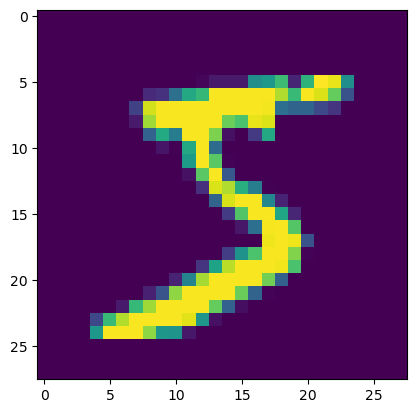

La clase de salida de la muestra es un 5


In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np

def showimg(img):
    plt.figure()
    plt.imshow(img)
    plt.show()
    plt.close()

# Cargamos los datos del dataset MNIST en particiones de entrenamiento y test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
num_classes = 10
n_elms, width, height = x_train.shape

# Miramos la forma de los datos. Tenemos 60k imagenes de entrenamiento de un
# tamaño de 28 píxeles por 28 con un solo canal. En test tenemos otras 10k imágenes.
print(x_train.shape, x_test.shape)

# Comprobamos que todo está en orden visualizando una imagen
showimg(x_train[0, :][:,:, None])
print(f"La clase de salida de la muestra es un {y_train[0]}")

<font color='red'>
Pregunta 4: Los más observadores habréis visto que hay *dos* conjuntos de datos distintos - train y test. Una de estas mitades de los datos se usa para entrenar el modelo y la otra para evaluar como funciona. No obstante, ¿por qué creéis que se usan particiones distintas? ¿No sería mejor emplear tantos datos como sea posible en entrenar el modelo? Además, a menudo se emplea una tercera partición de validación. Buscad para qué sirve (la vamos a usar aquí también!)
</font>

<font color='green'> RESPUESTA AQUÍ </font>

In [2]:
# Tenemos que mover los datos enteros al rango -1 a 1
x_train = (x_train.astype("float32") - 128) / 255
x_test = (x_test.astype("float32") - 128) / 255

# Primero usaremos capas feedforward, así que simplemente vamos a
# convertir nuestra imagen en un vector
x_train_ff = x_train.reshape((-1, width * height))
x_test_ff = x_test.reshape((-1, width * height))

print(x_train_ff.shape)

# Las imágenes tienen que tener una dimensión extra puesto que el modelo
# espera 1 o más canales de entrada si usamos redes convolucionales.
x_train_conv = np.expand_dims(x_train, -1)
x_test_conv = np.expand_dims(x_test, -1)

# La salida tiene que disponerse de forma que tengamos un vector
# categórico, no una etiqueta única
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(60000, 784)


In [3]:
# Es hora de definir el modelo
model = keras.Sequential(
    [
        keras.Input(shape=width * height),                        # Capa de entrada al modelo
        layers.Dense(width * height // 32, activation="relu"),     # Capa Feedforward 1
        layers.Dense(width * height // 32, activation="relu"),     # Capa Feedforward 2
        layers.Dense(width * height // 64, activation="relu"),     # Capa Feedforward 3
        layers.Dense(width * height // 64, activation="relu"),     # Capa Feedforward 4
        
        layers.Dense(num_classes, activation="softmax"),           # La salida categorica
                                                                   # necesita una capa
                                                                   # softmax SIEMPRE
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                18840     
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 10)                130       
                                                                 
Total params: 20,026
Trainable params: 20,026
Non-trainable params: 0
_________________________________________________________________


2022-11-13 19:03:45.810338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 19:03:45.903486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 19:03:45.904154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 19:03:45.905896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

En la visualización de arriba tenemos cada una de las capas intermedias del modelo, el tamaño de salida de cada capa y la cantidad de parámetros total.

Estamos preparados para entrenar el modelo

In [4]:
batch_size = 128
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train_ff, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
 68/422 [===>..........................] - ETA: 0s - loss: 1.9557 - accuracy: 0.3209

2022-11-13 19:03:48.041896: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 2s 2ms/step - loss: 0.8561 - accuracy: 0.7263 - val_loss: 0.3426 - val_accuracy: 0.8977
Epoch 2/30
422/422 [==============================] - 1s 2ms/step - loss: 0.3538 - accuracy: 0.8955 - val_loss: 0.2718 - val_accuracy: 0.9210
Epoch 3/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2981 - accuracy: 0.9114 - val_loss: 0.2240 - val_accuracy: 0.9332
Epoch 4/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.9212 - val_loss: 0.2243 - val_accuracy: 0.9347
Epoch 5/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2421 - accuracy: 0.9281 - val_loss: 0.2077 - val_accuracy: 0.9378
Epoch 6/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2261 - accuracy: 0.9333 - val_loss: 0.1833 - val_accuracy: 0.9440
Epoch 7/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2099 - accuracy: 0.9381 - val_loss: 0.1770 - val_accuracy: 0.9483
Epoch 8/30
422/42

Ahora toca evaluar el modelo con la partición de test.

In [5]:
score = model.evaluate(x_test_ff, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1519498974084854
Test accuracy: 0.955299973487854


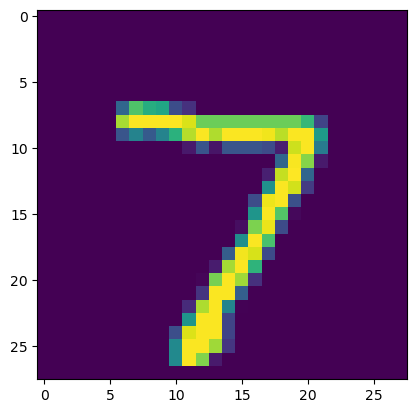

La clase de la imagen es 7


In [6]:
# Una vez el modelo está entrenado, podéis elegir una imagen cualquiera
# del conjunto de test y ver como la clasifica

index_sample = 0                      # elegimos la imagen 0 de test
test_img = x_test[index_sample]
test_class = y_test[index_sample]
showimg(test_img[:,:, None])
print(f"La clase de la imagen es {np.argmax(test_class)}")

In [7]:
# La pasamos por el modelo, a ver qué dice

class_output = model(test_img.reshape(-1, width * height))
print(f"El modelo predice una clase de {np.argmax(class_output)}")

El modelo predice una clase de 7


<font color='red'>
Pregunta 5: Buscad información acerca de las métricas de evaluación. ¿Qué significa tener una accuracy del 75%? ¿Nos interesa que las accuracies de training, validación, y test se parezcan o sean muy distintas? ¿Qué relación tiene la loss con la calidad del modelo? ¿Es una buena forma de evaluar?
</font>

<font color='green'> RESPUESTA AQUÍ </font>

<font color='red'>
Pregunta 6: Fijáos que en el código que extrae la clase, he escrito un ''' np.argmax() '''. ¿Qué hace esta función y qué relación tiene con la función de loss Entropía Cruzada (Cross Entropy)?
</font>

<font color='green'> RESPUESTA AQUÍ </font>

<font color='red'>
Pregunta 7: Es vuestro turno. Debéis probar de añadir o quitar capas al modelo, cambiar sus tamaños o sus funciones de activación. Tenéis que dejar al menos 3 versiones del modelo, cada cuál con al menos un cambio significativo y de las cuales al menos una mejore los resultados en la partición de test. Después de cada modelo tenéis que resumir como afecta cada cambio al tiempo de ejecución, a la calidad del modelo, al número de parámetros y a la.
</font>

In [8]:
# MODELO 1 
model1 = keras.Sequential(
    [
        keras.Input(shape=width * height),
        
        # # # # # # Modificad estas capas
        layers.Dense(width * height // 32, activation="relu"),     
        layers.Dense(width * height // 32, activation="relu"),     
        layers.Dense(width * height // 64, activation="relu"),     
        layers.Dense(width * height // 64, activation="relu"), 
        # # # # # # 
        
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model1.summary()

model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(x_train_ff, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model1.evaluate(x_test_ff, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 24)                18840     
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 12)                300       
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 10)                130       
                                                                 
Total params: 20,026
Trainable params: 20,026
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
422/422 [==============================

<font color='green'> VALORACIÓN DEL MODELO 1 AQUÍ </font>

In [9]:
# MODELO 2
model2 = keras.Sequential(
    [
        keras.Input(shape=width * height),
        
        # # # # # # Modificad estas capas
        layers.Dense(width * height // 32, activation="relu"),     
        layers.Dense(width * height // 32, activation="relu"),     
        layers.Dense(width * height // 64, activation="relu"),     
        layers.Dense(width * height // 64, activation="relu"), 
        # # # # # # 
        
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2.summary()

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(x_train_ff, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model2.evaluate(x_test_ff, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 24)                18840     
                                                                 
 dense_11 (Dense)            (None, 24)                600       
                                                                 
 dense_12 (Dense)            (None, 12)                300       
                                                                 
 dense_13 (Dense)            (None, 12)                156       
                                                                 
 dense_14 (Dense)            (None, 10)                130       
                                                                 
Total params: 20,026
Trainable params: 20,026
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
422/422 [==============================

<font color='green'> VALORACIÓN DEL MODELO 2 AQUÍ </font>

In [ ]:
# MODELO 3
model3 = keras.Sequential(
    [
        keras.Input(shape=width * height),
        
        # # # # # # Modificad estas capas
        layers.Dense(width * height // 32, activation="relu"),     
        layers.Dense(width * height // 32, activation="relu"),     
        layers.Dense(width * height // 64, activation="relu"),     
        layers.Dense(width * height // 64, activation="relu"), 
        # # # # # # 
        
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3.summary()

model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model3.fit(x_train_ff, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model3.evaluate(x_test_ff, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 24)                18840     
                                                                 
 dense_16 (Dense)            (None, 24)                600       
                                                                 
 dense_17 (Dense)            (None, 12)                300       
                                                                 
 dense_18 (Dense)            (None, 12)                156       
                                                                 
 dense_19 (Dense)            (None, 10)                130       
                                                                 
Total params: 20,026
Trainable params: 20,026
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
422/422 [==============================

<font color='green'> VALORACIÓN DEL MODELO 3 AQUÍ </font>

<font color='red'>
Pregunta extra: Ahora tratad de implementar un modelo basado en capas convolucionales. Observad las principales diferencias en rendimiento, tiempo de ejecución y número de parámetros con las versiones feedforward. ¿A qué se deben estas diferencias? 
</font>

Basáos en el [ejemplo](https://keras.io/examples/vision/mnist_convnet/) de Keras. Si usáis capas que no hayamos visto en clase o en el lab, investigad acerca de su función.

In [ ]:
# MODELO 3
model_conv = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        
        # Codigo aqui
        
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_conv.summary()

model_conv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_conv.fit(x_train_conv, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model_conv.evaluate(x_test_conv, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])